<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv')


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [4]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [5]:
#Affichage les 5 premières lignes de la table
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [6]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population["Valeur"] = population["Valeur"]*1000

In [7]:
#changement du nom de la colonne Valeur par Population
population.rename(columns={"Valeur":"Population"}, inplace=True)

In [8]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [9]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(dispo_alimentaire.shape[1]))

Le tableau comporte 15605 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


In [10]:
#Consulter le nombre de colonnes
nbr_colonnes_dispo_alimentaire = len(dispo_alimentaire.columns)
print(f"Le tableau comporte {nbr_colonnes_dispo_alimentaire} colonnes")

Le tableau comporte 18 colonnes


In [11]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [12]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire.fillna(0, inplace=True)

In [13]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
dispo_alimentaire['Disponibilité intérieure'] = dispo_alimentaire['Disponibilité intérieure']*1000
dispo_alimentaire['Exportations - Quantité'] = dispo_alimentaire['Exportations - Quantité']*1000
dispo_alimentaire['Importations - Quantité'] = dispo_alimentaire['Importations - Quantité']*1000
dispo_alimentaire['Nourriture'] = dispo_alimentaire['Nourriture']*1000
dispo_alimentaire['Pertes'] = dispo_alimentaire['Pertes']*1000
dispo_alimentaire['Production'] = dispo_alimentaire['Production']*1000
dispo_alimentaire['Semences'] = dispo_alimentaire['Semences']*1000
dispo_alimentaire['Traitement'] = dispo_alimentaire['Traitement']*1000
dispo_alimentaire['Variation de stock']= dispo_alimentaire['Variation de stock']*1000
dispo_alimentaire['Aliments pour animaux']=dispo_alimentaire['Aliments pour animaux']*1000
dispo_alimentaire['Autres Utilisations']=dispo_alimentaire['Autres Utilisations']*1000

In [14]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [15]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(aide_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(aide_alimentaire.shape[1]))

Le tableau comporte 1475 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [16]:
#Consulter le nombre de colonnes
aide_alimentaire.shape[1]

4

In [17]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [18]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire.rename(columns={'Pays bénéficiaire':'Zone'}, inplace=True)

In [19]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Valeur'] = aide_alimentaire['Valeur']*1000

In [20]:
#Affichage les 5 premières lignes de la table
print(aide_alimentaire.head())

          Zone  Année              Produit    Valeur
0  Afghanistan   2013  Autres non-céréales    682000
1  Afghanistan   2014  Autres non-céréales    335000
2  Afghanistan   2013         Blé et Farin  39224000
3  Afghanistan   2014         Blé et Farin  15160000
4  Afghanistan   2013             Céréales  40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [21]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(sous_nutrition.shape[0]))
print("Le tableau comporte {} colonne(s)".format(sous_nutrition.shape[1]))

Le tableau comporte 1218 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [22]:
#Consulter le nombre de colonnes
len(sous_nutrition.columns)

3

In [23]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [24]:
#Conversion de la colonne sous nutrition en numérique
#sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'])

In [25]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors = 'coerce')
sous_nutrition.fillna(0, inplace=True)

In [26]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition.rename(columns={'Valeur':'sous_nutrition'}, inplace=True)
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [27]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['sous_nutrition'] = sous_nutrition['sous_nutrition']*1000000

In [28]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [29]:
#Passage de population.Année en object
population['Année']=population['Année'].astype('object')

# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
sous_nutrition_2017 = sous_nutrition.loc[sous_nutrition['Année'] == '2016-2018']
population_2017 = population.loc[population['Année'] == 2017]
pop_sous_nutri_2017 = sous_nutrition_2017.merge(population_2017, on='Zone', how='inner')

In [30]:
#Affichage du dataset
pop_sous_nutri_2017.drop(columns=["Année_x"], inplace=True)
print(pop_sous_nutri_2017)

                                       Zone  sous_nutrition Année_y  \
0                               Afghanistan      10500000.0    2017   
1                            Afrique du Sud       3100000.0    2017   
2                                   Albanie        100000.0    2017   
3                                   Algérie       1300000.0    2017   
4                                 Allemagne             0.0    2017   
..                                      ...             ...     ...   
198  Venezuela (République bolivarienne du)       8000000.0    2017   
199                                Viet Nam       6500000.0    2017   
200                                   Yémen             0.0    2017   
201                                  Zambie             0.0    2017   
202                                Zimbabwe             0.0    2017   

     Population  
0    36296113.0  
1    57009756.0  
2     2884169.0  
3    41389189.0  
4    82658409.0  
..          ...  
198  29402484.0  
199

In [31]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
personnes_sous_nutri_2017 = pop_sous_nutri_2017['sous_nutrition'].sum()
display(personnes_sous_nutri_2017)

535700000.0

In [32]:
pop_totale = pop_sous_nutri_2017['Population'].sum()
pourcentage_personne_sous_nutri = round((personnes_sous_nutri_2017 / pop_totale) * 100,1)
print(pourcentage_personne_sous_nutri)

7.1


In [33]:
#Nbr personnes nourries :
nbr = pop_totale - personnes_sous_nutri_2017
print(nbr)

7008098779.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [34]:
#Combien mange en moyenne un être humain ? Source => 
#https://www.lepoint.fr/monde/la-fao-defend-ses-chiffres-de-la-faim-29-11-2016-2086634_24.php#11
print("Les recommandations sont de 2200Kcal par jour et par personne")

Les recommandations sont de 2200Kcal par jour et par personne


In [35]:
dispo_alimentaire_pays = pd.pivot_table(data=dispo_alimentaire,index=['Zone'],aggfunc="sum")
dispo_alimentaire_pays

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Origine,Pertes,Production,Produit,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,768000.0,415000.0,2087.0,351.41,33.50,58.26,13515000.0,278000.0,2988000.0,10735000.0,animalevegetalevegetalevegetalevegetaleanimale...,1135000.0,11171000.0,"Abats ComestibleAgrumes, AutresAliments pour e...",395000.0,63000.0,-368000.0
Afrique du Sud,5309000.0,876000.0,3020.0,564.80,83.58,85.33,61256000.0,11674000.0,7517000.0,29812000.0,animalevegetalevegetalevegetalevegetaleanimale...,2193000.0,63263000.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",253000.0,22819000.0,2153000.0
Albanie,660000.0,174000.0,3188.0,1095.54,106.48,111.37,4758000.0,94000.0,933000.0,3476000.0,animalevegetalevegetalevegetalevegetaleanimale...,276000.0,3964000.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",55000.0,113000.0,-45000.0
Algérie,4352000.0,1707000.0,3293.0,809.13,76.48,91.92,42630000.0,655000.0,17403000.0,31729000.0,animalevegetalevegetalevegetalevegetaleanimale...,3753000.0,26359000.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",449000.0,637000.0,-479000.0
Allemagne,30209000.0,7711000.0,3503.0,957.52,141.62,101.39,162275000.0,57431000.0,65353000.0,79238000.0,animalevegetalevegetalevegetalevegetaleanimale...,3781000.0,154547000.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",1551000.0,39842000.0,-192000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1174000.0,2689000.0,3275.0,700.24,87.16,104.51,11850000.0,4343000.0,15327000.0,6548000.0,animalevegetalevegetalevegetalevegetaleanimale...,705000.0,1192000.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3000.0,804000.0,-327000.0
Équateur,1200000.0,1909000.0,2346.0,544.91,94.64,61.30,18614000.0,8002000.0,1725000.0,8574000.0,animalevegetalevegetalevegetalevegetaleanimale...,707000.0,24337000.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",138000.0,6200000.0,557000.0
États-Unis d'Amérique,148432000.0,154699000.0,3682.0,1002.39,161.37,109.42,777992000.0,163524000.0,81887000.0,320889000.0,animalevegetalevegetalevegetalevegetaleanimale...,7162000.0,894668000.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",10403000.0,141010000.0,-35032000.0


In [36]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
pop_dispo_alimentaire = pd.merge(population, dispo_alimentaire_pays, how='inner', on=['Zone', 'Zone'])
pop_dispo_alimentaire = pop_dispo_alimentaire.loc[pop_dispo_alimentaire['Année'] == 2017]
# Choix de l'année 2017 pour faire suite à l'exercice précédent

In [37]:
#Affichage du nouveau dataframe
print(pop_dispo_alimentaire)

                                        Zone Année  Population  \
4                                Afghanistan  2017  36296113.0   
10                            Afrique du Sud  2017  57009756.0   
16                                   Albanie  2017   2884169.0   
22                                   Algérie  2017  41389189.0   
28                                 Allemagne  2017  82658409.0   
...                                      ...   ...         ...   
1006  Venezuela (République bolivarienne du)  2017  29402484.0   
1012                                Viet Nam  2017  94600648.0   
1018                                   Yémen  2017  27834819.0   
1024                                  Zambie  2017  16853599.0   
1030                                Zimbabwe  2017  14236595.0   

      Aliments pour animaux  Autres Utilisations  \
4                  768000.0             415000.0   
10                5309000.0             876000.0   
16                 660000.0             174000.0   

In [38]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
dispo_kcal_pays = round((pop_dispo_alimentaire['Population'] * pop_dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)']), 1)
pop_dispo_alimentaire['dispo_kcal_pays'] = dispo_kcal_pays
pop_dispo_alimentaire

,Zone,Année,Population,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Origine,Pertes,Production,Produit,Semences,Traitement,Variation de stock,dispo_kcal_pays
4,Afghanistan,2017,36296113.0,768000.0,415000.0,2087.0,351.41,33.50,58.26,13515000.0,...,2988000.0,10735000.0,animalevegetalevegetalevegetalevegetaleanimale...,1135000.0,11171000.0,"Abats ComestibleAgrumes, AutresAliments pour e...",395000.0,63000.0,-368000.0,7.574999e+10
10,Afrique du Sud,2017,57009756.0,5309000.0,876000.0,3020.0,564.80,83.58,85.33,61256000.0,...,7517000.0,29812000.0,animalevegetalevegetalevegetalevegetaleanimale...,2193000.0,63263000.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",253000.0,22819000.0,2153000.0,1.721695e+11
16,Albanie,2017,2884169.0,660000.0,174000.0,3188.0,1095.54,106.48,111.37,4758000.0,...,933000.0,3476000.0,animalevegetalevegetalevegetalevegetaleanimale...,276000.0,3964000.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",55000.0,113000.0,-45000.0,9.194731e+09
22,Algérie,2017,41389189.0,4352000.0,1707000.0,3293.0,809.13,76.48,91.92,42630000.0,...,17403000.0,31729000.0,animalevegetalevegetalevegetalevegetaleanimale...,3753000.0,26359000.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",449000.0,637000.0,-479000.0,1.362946e+11
28,Allemagne,2017,82658409.0,30209000.0,7711000.0,3503.0,957.52,141.62,101.39,162275000.0,...,65353000.0,79238000.0,animalevegetalevegetalevegetalevegetaleanimale...,3781000.0,154547000.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",1551000.0,39842000.0,-192000.0,2.895524e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,Venezuela (République bolivarienne du),2017,29402484.0,2878000.0,335000.0,2633.0,652.86,82.44,72.96,32287000.0,...,9604000.0,19853000.0,animalevegetalevegetalevegetalevegetaleanimale...,1190000.0,23868000.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",91000.0,7957000.0,-1130000.0,7.741674e+10
1012,Viet Nam,2017,94600648.0,11356000.0,3815000.0,2744.0,574.84,72.11,81.61,95134000.0,...,9217000.0,52700000.0,animalevegetalevegetalevegetaleanimalevegetale...,6743000.0,108275000.0,"Abats ComestibleAgrumes, AutresAliments pour e...",1211000.0,19311000.0,278000.0,2.595842e+11
1018,Yémen,2017,27834819.0,210000.0,72000.0,2217.0,375.41,47.81,58.90,9782000.0,...,6786000.0,9162000.0,animalevegetalevegetalevegetalevegetaleanimale...,269000.0,4125000.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",67000.0,39000.0,-408000.0,6.170979e+10
1024,Zambie,2017,16853599.0,408000.0,69000.0,1924.0,350.12,42.05,55.22,10041000.0,...,380000.0,5088000.0,animalevegetalevegetalevegetalevegetalevegetal...,242000.0,10526000.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",76000.0,4178000.0,-182000.0,3.242632e+10


In [39]:
#Calcul du nombre d'humains pouvant être nourris
pop_totale = pop_dispo_alimentaire["Population"].sum()
kcal_total = pop_dispo_alimentaire["dispo_kcal_pays"].sum()
kcal_mini = 2200
pers_nourrie =round((kcal_total/kcal_mini),0)

print(f'Il aurait pu y avoir {pers_nourrie} personnes nourries dans le monde en 2017.')

pourcentage_personne_nourrie = round((pers_nourrie / pop_totale) * 100,1)
print(f'Soit {pourcentage_personne_nourrie}% de la population mondiale')

Il aurait pu y avoir 9508629376.0 personnes nourries dans le monde en 2017.
Soit 130.4% de la population mondiale


In [40]:
reserves_dispo = round(pop_dispo_alimentaire['Disponibilité alimentaire en quantité (kg/personne/an)'].sum(),2)
print(f'Il y a {reserves_dispo}kg/personnes/an disponible en quantité alimentaire dans le monde.')
reserves_dispo_jours = round(reserves_dispo/365,2)  
print(f'Soit {reserves_dispo_jours}kg par jour et par personne')
reserves_dispo_max = round(pop_dispo_alimentaire['Disponibilité alimentaire en quantité (kg/personne/an)'].max(),2)
max_jour = round(reserves_dispo_max/365,2)
reserves_dispo_mini = pop_dispo_alimentaire['Disponibilité alimentaire en quantité (kg/personne/an)'].min()
min_jours = round(reserves_dispo_mini/365,2)
print(f"Certains pays disposent de {reserves_dispo_mini}kgs/pers/an, soit : {min_jours} par jours et par personnes, et d'autres de {reserves_dispo_max}kgs/pers/an ({max_jour}kgs/jours/pers)'")
moy_reserves_dispo = round(pop_dispo_alimentaire['Disponibilité alimentaire en quantité (kg/personne/an)'].mean(),2)
print(f"Pour une répartition équitable, il faudrait {moy_reserves_dispo}kgs/pers/an")
moy_reserves_dispo_jours = moy_reserves_dispo = round(pop_dispo_alimentaire['Disponibilité alimentaire en quantité (kg/personne/an)'].mean()/365,2)
print(f"Soit {moy_reserves_dispo_jours}kgs/pers/jours.")


Il y a 120366.71kg/personnes/an disponible en quantité alimentaire dans le monde.
Soit 329.77kg par jour et par personne
Certains pays disposent de 319.45kgs/pers/an, soit : 0.88 par jours et par personnes, et d'autres de 1210.41kgs/pers/an (3.32kgs/jours/pers)'
Pour une répartition équitable, il faudrait 699.81kgs/pers/an
Soit 1.92kgs/pers/jours.


In [41]:
reserves_dispo_kcal= round(pop_dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'].mean(),2)
reserves_dispo_kcal


2841.64

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [42]:
#Transfert des données avec les végétaux dans un nouveau dataframe
dispo_alimentaire_vegetale = dispo_alimentaire.loc[dispo_alimentaire['Origine'] == 'vegetale']
dispo_alimentaire_vegetale

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0
6,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3000.0,0.0,3000.0,3000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15595,Îles Salomon,Sésame,vegetale,0.0,0.0,0.0,0.01,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15596,Îles Salomon,Thé,vegetale,0.0,0.0,0.0,0.17,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15597,Îles Salomon,Tomates,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
dispo_alimentaire_vegetale_clean = pd.pivot_table(data=dispo_alimentaire_vegetale,index=['Zone'],aggfunc="sum")
dispo_alimentaire_vegetale_clean

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Origine,Pertes,Production,Produit,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,645000.0,415000.0,1871.0,271.49,18.27,46.05,10884000.0,278000.0,2638000.0,8293000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,1072000.0,8891000.0,"Agrumes, AutresAliments pour enfantsAnanasBana...",393000.0,63000.0,-368000.0
Afrique du Sud,5122000.0,761000.0,2533.0,425.17,48.92,48.94,53439000.0,10586000.0,6468000.0,22441000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,2110000.0,55649000.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",186000.0,22819000.0,1912000.0
Albanie,559000.0,172000.0,2203.0,706.49,38.76,51.96,3326000.0,84000.0,846000.0,2241000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,182000.0,2609000.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",55000.0,113000.0,-45000.0
Algérie,4352000.0,1706000.0,2915.0,632.35,54.12,66.94,35510000.0,649000.0,14672000.0,24797000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,3587000.0,21964000.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",428000.0,637000.0,-479000.0
Allemagne,28122000.0,6842000.0,2461.0,568.82,63.63,39.90,126866000.0,34454000.0,50642000.0,47079000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,3717000.0,110926000.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",1475000.0,39686000.0,-247000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1174000.0,2619000.0,2718.0,473.18,53.00,62.81,9623000.0,3326000.0,12546000.0,4426000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,675000.0,780000.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",0.0,804000.0,-376000.0
Équateur,1001000.0,1905000.0,1732.0,327.21,49.48,24.80,14926000.0,7142000.0,1475000.0,5149000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,654000.0,20042000.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",125000.0,6200000.0,555000.0
États-Unis d'Amérique,145289000.0,145102000.0,2698.0,590.68,93.68,39.65,632023000.0,140442000.0,69522000.0,189122000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,6937000.0,740194000.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",9030000.0,140986000.0,-37242000.0


In [44]:
dispo_vegetale_total = pd.merge(population_2017,dispo_alimentaire_vegetale_clean, how='inner', on=['Zone', 'Zone'])
dispo_vegetale_total

,Zone,Année,Population,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Origine,Pertes,Production,Produit,Semences,Traitement,Variation de stock
0,Afghanistan,2017,36296113.0,645000.0,415000.0,1871.0,271.49,18.27,46.05,10884000.0,278000.0,2638000.0,8293000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,1072000.0,8891000.0,"Agrumes, AutresAliments pour enfantsAnanasBana...",393000.0,63000.0,-368000.0
1,Afrique du Sud,2017,57009756.0,5122000.0,761000.0,2533.0,425.17,48.92,48.94,53439000.0,10586000.0,6468000.0,22441000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,2110000.0,55649000.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",186000.0,22819000.0,1912000.0
2,Albanie,2017,2884169.0,559000.0,172000.0,2203.0,706.49,38.76,51.96,3326000.0,84000.0,846000.0,2241000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,182000.0,2609000.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",55000.0,113000.0,-45000.0
3,Algérie,2017,41389189.0,4352000.0,1706000.0,2915.0,632.35,54.12,66.94,35510000.0,649000.0,14672000.0,24797000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,3587000.0,21964000.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",428000.0,637000.0,-479000.0
4,Allemagne,2017,82658409.0,28122000.0,6842000.0,2461.0,568.82,63.63,39.90,126866000.0,34454000.0,50642000.0,47079000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,3717000.0,110926000.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",1475000.0,39686000.0,-247000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402484.0,2778000.0,278000.0,2157.0,442.56,51.20,34.83,25637000.0,45000.0,7243000.0,13458000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,1109000.0,19565000.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",60000.0,7957000.0,-1130000.0
168,Viet Nam,2017,94600648.0,10647000.0,3595000.0,2169.0,459.79,24.62,50.56,83617000.0,20069000.0,6534000.0,42153000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,6728000.0,96972000.0,"Agrumes, AutresAliments pour enfantsAnanasArac...",1187000.0,19311000.0,178000.0
169,Yémen,2017,27834819.0,210000.0,65000.0,2028.0,303.73,35.22,45.05,8017000.0,542000.0,5900000.0,7413000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,251000.0,3078000.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",56000.0,39000.0,-418000.0
170,Zambie,2017,16853599.0,402000.0,68000.0,1818.0,316.47,35.06,45.99,9537000.0,663000.0,293000.0,4600000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,235000.0,10096000.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",73000.0,4178000.0,-182000.0


In [45]:
#Calcul du nombre de kcal disponible pour les végétaux
dispo_kcal_vegetale = round((dispo_vegetale_total['Population'] * dispo_vegetale_total['Disponibilité alimentaire (Kcal/personne/jour)']), 1)
dispo_vegetale_total['dispo_kcal_vegetal'] = dispo_kcal_vegetale
dispo_vegetale_total

,Zone,Année,Population,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Origine,Pertes,Production,Produit,Semences,Traitement,Variation de stock,dispo_kcal_vegetal
0,Afghanistan,2017,36296113.0,645000.0,415000.0,1871.0,271.49,18.27,46.05,10884000.0,...,2638000.0,8293000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,1072000.0,8891000.0,"Agrumes, AutresAliments pour enfantsAnanasBana...",393000.0,63000.0,-368000.0,6.791003e+10
1,Afrique du Sud,2017,57009756.0,5122000.0,761000.0,2533.0,425.17,48.92,48.94,53439000.0,...,6468000.0,22441000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,2110000.0,55649000.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",186000.0,22819000.0,1912000.0,1.444057e+11
2,Albanie,2017,2884169.0,559000.0,172000.0,2203.0,706.49,38.76,51.96,3326000.0,...,846000.0,2241000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,182000.0,2609000.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",55000.0,113000.0,-45000.0,6.353824e+09
3,Algérie,2017,41389189.0,4352000.0,1706000.0,2915.0,632.35,54.12,66.94,35510000.0,...,14672000.0,24797000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,3587000.0,21964000.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",428000.0,637000.0,-479000.0,1.206495e+11
4,Allemagne,2017,82658409.0,28122000.0,6842000.0,2461.0,568.82,63.63,39.90,126866000.0,...,50642000.0,47079000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,3717000.0,110926000.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",1475000.0,39686000.0,-247000.0,2.034223e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402484.0,2778000.0,278000.0,2157.0,442.56,51.20,34.83,25637000.0,...,7243000.0,13458000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,1109000.0,19565000.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",60000.0,7957000.0,-1130000.0,6.342116e+10
168,Viet Nam,2017,94600648.0,10647000.0,3595000.0,2169.0,459.79,24.62,50.56,83617000.0,...,6534000.0,42153000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,6728000.0,96972000.0,"Agrumes, AutresAliments pour enfantsAnanasArac...",1187000.0,19311000.0,178000.0,2.051888e+11
169,Yémen,2017,27834819.0,210000.0,65000.0,2028.0,303.73,35.22,45.05,8017000.0,...,5900000.0,7413000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,251000.0,3078000.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",56000.0,39000.0,-418000.0,5.644901e+10
170,Zambie,2017,16853599.0,402000.0,68000.0,1818.0,316.47,35.06,45.99,9537000.0,...,293000.0,4600000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,235000.0,10096000.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",73000.0,4178000.0,-182000.0,3.063984e+10


In [46]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
pop_totale_vegetale = dispo_vegetale_total["Population"].sum()
kcal_total_vegetale = dispo_vegetale_total["dispo_kcal_vegetal"].sum()
pers_nourrie_vegetale = round((kcal_total_vegetale/kcal_mini))
print(f"Sur une base de 2200 KCal par personne/jour, il pourrait y avoir {pers_nourrie_vegetale} personnes nourries par les végétaux à travers le monde.")

#Calcul pourcentage
proportion_personne_nourrie_vegetale = round((pers_nourrie_vegetale / pop_totale_vegetale) * 100,1)
print(f"Soit : {proportion_personne_nourrie_vegetale} % de la population de 2017")

Sur une base de 2200 KCal par personne/jour, il pourrait y avoir 7845801914 personnes nourries par les végétaux à travers le monde.
Soit : 107.6 % de la population de 2017


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [47]:
#Calcul de la disponibilité totale
dispo_alimentaire_interieure = pop_dispo_alimentaire["Disponibilité intérieure"].sum()

'''Equation 
Production + Importations - Exportations + Variation de stock
=
Disponibilité intérieure
=
Semences + Pertes + Nourriture + Aliments pour animaux + Traitement + Autres utilisations'''

total_production = pop_dispo_alimentaire['Production'].sum()
total_importation = pop_dispo_alimentaire['Importations - Quantité'].sum()
total_exportation = pop_dispo_alimentaire['Exportations - Quantité'].sum()
total_variation = pop_dispo_alimentaire['Variation de stock'].sum()
total_semences = pop_dispo_alimentaire['Semences'].sum()
total_pertes = pop_dispo_alimentaire['Pertes'].sum()
total_nourriture = pop_dispo_alimentaire['Nourriture'].sum()
total_animaux = pop_dispo_alimentaire['Aliments pour animaux'].sum()
total_traitement = pop_dispo_alimentaire['Traitement'].sum()
total_autre = pop_dispo_alimentaire['Autres Utilisations'].sum()
eq_calcul1 = total_production + total_importation-total_exportation + total_variation
eq_calcul2 = total_semences+total_pertes+total_nourriture+total_animaux+total_traitement+total_autre

print('Le calcul est égal à :')
print('Production + Importations - Exportations + Variation de stock =')
print('Disponibilité intérieure =')
print('Semences + Pertes + Nourriture + Aliments pour animaux + Traitement + Autres utilisations')
print("")
print('Soit :')
print(f'{total_production} + {total_importation} - {total_exportation} + {total_variation} = {eq_calcul1}')
print(f' = {dispo_alimentaire_interieure}')
print(f'= {total_semences} + {total_pertes} + {total_animaux} + {total_traitement} + {total_autre} = {eq_calcul2}')

Le calcul est égal à :
Production + Importations - Exportations + Variation de stock =
Disponibilité intérieure =
Semences + Pertes + Nourriture + Aliments pour animaux + Traitement + Autres utilisations

Soit :
9921364000.0 + 1247345000.0 - 1331999000.0 + -102605000.0 = 9734105000.0
 = 9733927000.0
= 153317000.0 + 452283000.0 + 1288002000.0 + 2185641000.0 + 858771000.0 = 9743539000.0


In [48]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
liste_total = ['Aliments pour animaux', 'Nourriture', 'Pertes', 'Semences', 'Traitement', 'Autres Utilisations']
for total in liste_total:
    resultat = round((pop_dispo_alimentaire[total].sum()/dispo_alimentaire_interieure)*100,2)
    print(total, resultat)

Aliments pour animaux 13.23
Nourriture 49.37
Pertes 4.65
Semences 1.58
Traitement 22.45
Autres Utilisations 8.82


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [49]:
#Création d'une liste avec toutes les variables
liste_variable_nourriture = dispo_alimentaire["Produit"].unique()
liste_variable_nourriture

array(['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants',
       'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé',
       'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao', 'Fruits, Autres', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres',
       'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees',
       'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge',
       'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre',
       'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)',
       'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame',
       'Thé', 'Toma

In [50]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
df_cereales = dispo_alimentaire.copy()

df_cereales = df_cereales.loc[(df_cereales["Produit"] == "Millet") | (df_cereales["Produit"] == "Orge") | (df_cereales["Produit"] == "Seigle")| (df_cereales["Produit"] == "Céréales, Autres")| (df_cereales["Produit"] == "Blé")| (df_cereales["Produit"] == "Sorgho")| (df_cereales["Produit"] == "Maïs")| (df_cereales["Produit"] == "Avoine") | (df_cereales["Produit"] == "Riz (Eq Blanchi)")]
df_cereales

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5992000.0,0.0,1173000.0,4895000.0,775000.0,5169000.0,322000.0,0.0,-350000.0
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,Afghanistan,Maïs,vegetale,200000.0,0.0,21.0,2.50,0.30,0.56,313000.0,0.0,1000.0,76000.0,31000.0,312000.0,5000.0,0.0,0.0
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,13000.0,0.0,0.0,12000.0,1000.0,13000.0,0.0,0.0,0.0
40,Afghanistan,Orge,vegetale,360000.0,0.0,26.0,2.92,0.24,0.79,524000.0,0.0,10000.0,89000.0,52000.0,514000.0,22000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15545,Îles Salomon,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15568,Îles Salomon,Maïs,vegetale,0.0,0.0,1.0,0.15,0.01,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15575,Îles Salomon,Orge,vegetale,0.0,0.0,0.0,0.07,0.00,0.01,1000.0,0.0,1000.0,0.0,0.0,0.0,0.0,1000.0,0.0
15591,Îles Salomon,Riz (Eq Blanchi),vegetale,0.0,12000.0,623.0,63.76,1.36,10.90,49000.0,0.0,47000.0,36000.0,1000.0,3000.0,0.0,0.0,0.0


In [51]:
produits_cereales = pd.pivot_table(data=df_cereales,index=['Zone'],aggfunc="sum")
produits_cereales

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Origine,Pertes,Production,Produit,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,560000.0,0.0,1560.0,179.87,5.52,41.04,7303000.0,0.0,1303000.0,5494000.0,vegetalevegetalevegetalevegetalevegetalevegetale,883000.0,6350000.0,"BléCéréales, AutresMaïsMilletOrgeRiz (Eq Blanchi)",363000.0,0.0,-350000.0
Afrique du Sud,4824000.0,0.0,1538.0,180.02,10.20,41.09,15493000.0,3777000.0,3147000.0,9503000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,500000.0,14155000.0,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",73000.0,593000.0,1969000.0
Albanie,411000.0,134000.0,1144.0,149.27,6.08,35.49,1145000.0,4000.0,468000.0,474000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,91000.0,703000.0,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",22000.0,12000.0,-22000.0
Algérie,4337000.0,820000.0,1678.0,217.67,6.79,49.33,15013000.0,2000.0,10279000.0,8535000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,1024000.0,4914000.0,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",253000.0,42000.0,-180000.0
Allemagne,26615000.0,1013000.0,872.0,111.11,3.48,26.39,42158000.0,16721000.0,11093000.0,9191000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,1221000.0,47757000.0,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",1027000.0,3090000.0,28000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1053000.0,263000.0,1379.0,158.68,5.66,34.21,3142000.0,619000.0,4249000.0,1484000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,384000.0,55000.0,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",0.0,0.0,-543000.0
Équateur,847000.0,787000.0,812.0,95.57,3.12,18.85,3407000.0,53000.0,877000.0,1505000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,138000.0,2598000.0,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",39000.0,93000.0,-15000.0
États-Unis d'Amérique,140096000.0,137181000.0,801.0,105.63,3.63,23.70,343006000.0,66302000.0,13477000.0,33810000.0,vegetalevegetalevegetalevegetalevegetalevegeta...,222000.0,433686000.0,"AvoineBléCéréales, AutresMaïsMilletOrgeRiz (Eq...",3098000.0,28608000.0,-37854000.0


In [52]:
#Affichage de la proportion d'alimentation animale
utilisation_animale = produits_cereales['Aliments pour animaux'].sum()
nourriture = produits_cereales['Nourriture'].sum()
disponibilite_interieure = produits_cereales['Disponibilité intérieure'].sum()

proportion_animale = round((utilisation_animale/disponibilite_interieure) * 100,1)
print("Proportion pour l'alimentation animale :", proportion_animale,"%")

Proportion pour l'alimentation animale : 36.3 %


In [53]:
#Affichage de la proportion d'alimentation animale
proportion_nourriture = round((nourriture/disponibilite_interieure) * 100,1)
print("Proportion pour l'alimentation humaine:",proportion_nourriture,"%")

Proportion pour l'alimentation humaine: 42.8 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [54]:
#Création de la colonne proportion par pays
pop_sous_nutri_2017['Proportion sous nutri'] = round((pop_sous_nutri_2017['sous_nutrition']
                                                        /pop_sous_nutri_2017['Population'])*100,2)
pop_sous_nutri_2017.head()

,Zone,sous_nutrition,Année_y,Population,Proportion sous nutri
0,Afghanistan,10500000.0,2017,36296113.0,28.93
1,Afrique du Sud,3100000.0,2017,57009756.0,5.44
2,Albanie,100000.0,2017,2884169.0,3.47
3,Algérie,1300000.0,2017,41389189.0,3.14
4,Allemagne,0.0,2017,82658409.0,0.00


In [55]:
#affichage après trie des 10 pires pays
pop_sous_nutri_2017.sort_values(by = 'Proportion sous nutri', ascending=False, inplace=True)
pop_sous_nutri_2017.head(10)
pop_sous_nutri_2017['Zone'] = pop_sous_nutri_2017['Zone'].replace(['République populaire démocratique de Corée'],['Corée du Nord'])

<BarContainer object of 10 artists>

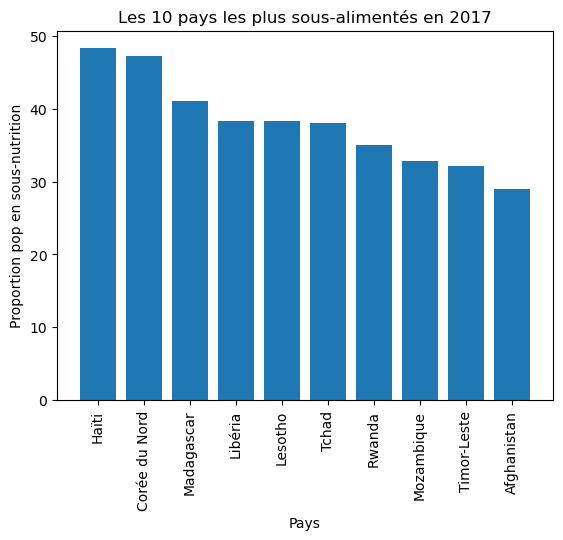

In [56]:
#Création graphique
top10_sous_nutri = pop_sous_nutri_2017.sort_values('Proportion sous nutri', ascending = False).head(10)
plt.xticks(rotation = 'vertical')
plt.title("Les 10 pays les plus sous-alimentés en 2017")
plt.xlabel('Pays')
plt.ylabel('Proportion pop en sous-nutrition')
plt.bar(top10_sous_nutri['Zone'],
        top10_sous_nutri['Proportion sous nutri'])

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [57]:
#calcul du total de l'aide alimentaire par pays
pays_benef_2013 = aide_alimentaire.groupby('Zone')[['Valeur']].sum()
pays_benef_2013.sort_values(by = 'Valeur', ascending = False)
pays_benef_2013= pd.DataFrame(pays_benef_2013).reset_index()
pays_benef_2013

,Zone,Valeur
0,Afghanistan,185452000
1,Algérie,81114000
2,Angola,5014000
3,Bangladesh,348188000
4,Bhoutan,2666000
...,...,...
71,Zambie,3026000
72,Zimbabwe,62570000
73,Égypte,1122000
74,Équateur,1362000


<BarContainer object of 10 artists>

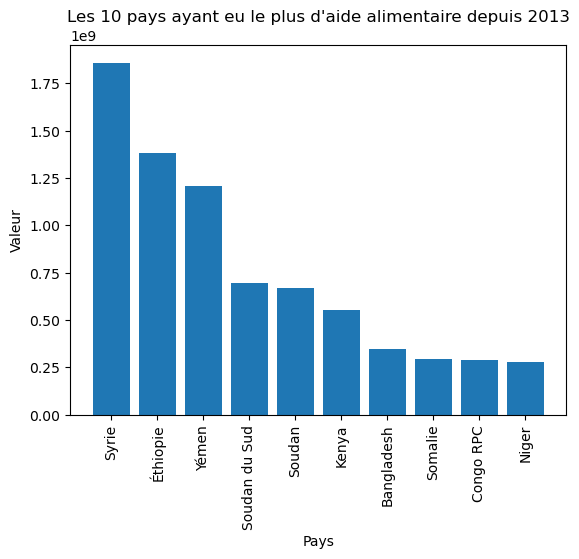

In [58]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
pays_benef_2013['Zone'] = pays_benef_2013['Zone'].replace(['République démocratique du Congo', 'République arabe syrienne'],['Congo RPC', 'Syrie'])

top10_benef_aide = pays_benef_2013.sort_values('Valeur', ascending = False).head(10)
plt.xticks(rotation = 'vertical')
plt.title("Les 10 pays ayant eu le plus d'aide alimentaire depuis 2013")
plt.xlabel('Pays')
plt.ylabel('Valeur')
plt.bar(top10_benef_aide['Zone'],
        top10_benef_aide['Valeur'])

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [59]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
aide_alimentaire.head()
aide_alimentaire_date = aide_alimentaire.loc[(aide_alimentaire['Année'] >=2013)&(aide_alimentaire['Année'] <=2016)]
aide_alimentaire_date=aide_alimentaire_date.groupby(by ='Zone')[['Valeur']].sum().reset_index()
aide_alimentaire_date.sort_values(by = 'Valeur',ascending=False, inplace=True)
aide_alimentaire_date

,Zone,Valeur
50,République arabe syrienne,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000
...,...,...
73,Égypte,1122000
69,Vanuatu,802000
67,Timor-Leste,116000
24,Géorgie,70000


In [60]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
aide_alimentaire_date.head(5)

,Zone,Valeur
50,République arabe syrienne,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000


In [61]:
#On filtre sur le dataframe avec notre liste
liste_pays = ['République arabe syrienne','Éthiopie','Yémen','Soudan du Sud','Soudan']
aide_alimentaire_clean = aide_alimentaire.loc[(aide_alimentaire["Zone"] == "République arabe syrienne") | (aide_alimentaire["Zone"] == "Éthiopie") | (aide_alimentaire["Zone"] == "Yémen")| (aide_alimentaire["Zone"] == "Soudan du Sud")| (aide_alimentaire["Zone"] == "Soudan")]
aide_alimentaire_clean = pd.pivot_table(data=aide_alimentaire_clean,index=['Zone','Année'],aggfunc="sum")
aide_alimentaire_clean.reset_index(inplace=True)
#aide_alimentaire_clean = aide_alimentaire_clean.groupby("Zone", "Année").size()
aide_alimentaire_clean.drop(columns=["Produit"], inplace=True)
aide_alimentaire_clean

,Zone,Année,Valeur
0,République arabe syrienne,2013,563566000
1,République arabe syrienne,2014,651870000
2,République arabe syrienne,2015,524949000
3,République arabe syrienne,2016,118558000
4,Soudan,2013,330230000
5,Soudan,2014,321904000
6,Soudan,2015,17650000
7,Soudan du Sud,2013,196330000
8,Soudan du Sud,2014,450610000
9,Soudan du Sud,2015,48308000


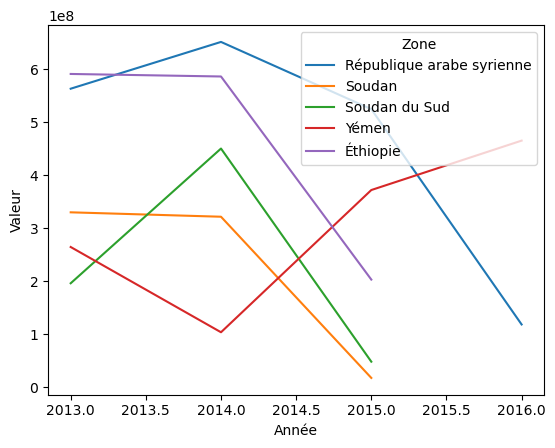

In [62]:
# Affichage des pays avec l'aide alimentaire par année
sns.lineplot(x="Année",y="Valeur",hue="Zone",data=aide_alimentaire_clean)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [63]:
#Calcul de la disponibilité en kcal par personne par jour par pays
dispo_alimentaire_2017 = pd.merge(population_2017,dispo_alimentaire_pays, how='inner', on=['Zone', 'Zone'])
dispo_alimentaire_2017 = dispo_alimentaire_2017.rename(columns={"Valeur" : "Population"})
dispo_alimentaire_2017
dispo_alimentaire_2017['Zone'] = dispo_alimentaire_2017['Zone'].replace(['République populaire démocratique de Corée', 'République centrafricaine'],['Corée du nord', 'Centrafrique'])

dispo_alimentaire_2017.sort_values(by= 'Disponibilité alimentaire (Kcal/personne/jour)', inplace=True)
dispo_alimentaire_2017.head(10)

,Zone,Année,Population,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Origine,Pertes,Production,Produit,Semences,Traitement,Variation de stock
131,Centrafrique,2017,4596023.0,1000.0,27000.0,1879.0,453.73,59.41,46.04,2582000.0,0.0,76000.0,2092000.0,animalevegetalevegetalevegetalevegetalevegetal...,122000.0,2503000.0,"Abats ComestibleAlcool, non ComestibleAliments...",63000.0,278000.0,3000.0
170,Zambie,2017,16853599.0,408000.0,69000.0,1924.0,350.12,42.05,55.22,10041000.0,675000.0,380000.0,5088000.0,animalevegetalevegetalevegetalevegetalevegetal...,242000.0,10526000.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",76000.0,4178000.0,-182000.0
97,Madagascar,2017,25570512.0,842000.0,2522000.0,2056.0,425.07,24.49,46.69,15216000.0,236000.0,924000.0,9741000.0,animalevegetalevegetalevegetalevegetaleanimale...,966000.0,14160000.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",375000.0,844000.0,375000.0
0,Afghanistan,2017,36296113.0,768000.0,415000.0,2087.0,351.41,33.50,58.26,13515000.0,278000.0,2988000.0,10735000.0,animalevegetalevegetalevegetalevegetaleanimale...,1135000.0,11171000.0,"Abats ComestibleAgrumes, AutresAliments pour e...",395000.0,63000.0,-368000.0
70,Haïti,2017,10982366.0,481000.0,115000.0,2089.0,397.78,48.92,47.70,6175000.0,15000.0,1204000.0,4101000.0,animalevegetalevegetalevegetalevegetaleanimale...,679000.0,5072000.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",36000.0,762000.0,-77000.0
136,Corée du nord,2017,25429825.0,816000.0,695000.0,2093.0,458.93,36.41,54.99,14876000.0,83000.0,993000.0,11425000.0,animaleanimalevegetaleanimalevegetalevegetalev...,1066000.0,13883000.0,Abats ComestibleAnimaux Aquatiques AutreAvoine...,194000.0,678000.0,84000.0
156,Tchad,2017,15016753.0,104000.0,2000.0,2109.0,319.45,47.10,62.75,5304000.0,0.0,290000.0,4097000.0,animalevegetalevegetaleanimalevegetalevegetale...,459000.0,5153000.0,"Abats ComestibleAlcool, non ComestibleAliments...",101000.0,542000.0,-141000.0
171,Zimbabwe,2017,14236595.0,131000.0,23000.0,2113.0,336.59,57.18,48.32,9507000.0,278000.0,1342000.0,4762000.0,animalevegetalevegetalevegetalevegetalevegetal...,188000.0,7914000.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",76000.0,4330000.0,531000.0
120,Ouganda,2017,41166588.0,348000.0,68000.0,2126.0,535.58,46.57,52.64,26624000.0,1218000.0,1257000.0,20121000.0,animalevegetalevegetalevegetalevegetaleanimale...,991000.0,26321000.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",154000.0,4982000.0,269000.0
55,Éthiopie,2017,106399924.0,685000.0,3641000.0,2129.0,354.55,25.89,60.39,44014000.0,941000.0,1711000.0,33361000.0,animalevegetalevegetalevegetalevegetalevegetal...,2256000.0,46102000.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",640000.0,3443000.0,-2857000.0


<BarContainer object of 10 artists>

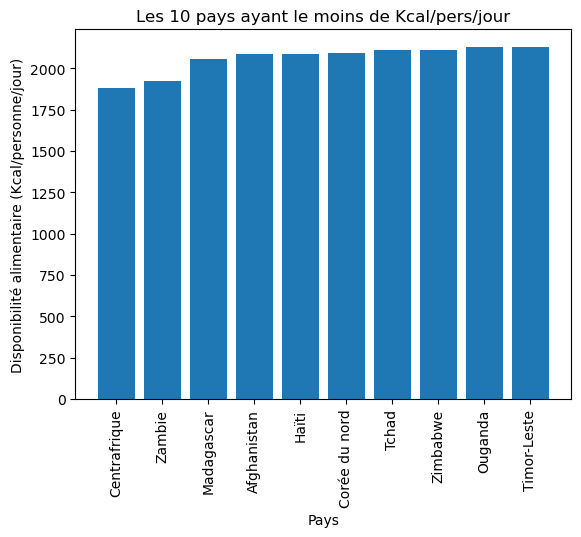

In [64]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
top10_kcal = dispo_alimentaire_2017.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending = True).head(10)
plt.xticks(rotation = 'vertical')
plt.title("Les 10 pays ayant le moins de Kcal/pers/jour")
plt.xlabel('Pays')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.bar(top10_kcal['Zone'],
        top10_kcal['Disponibilité alimentaire (Kcal/personne/jour)'])

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

<BarContainer object of 10 artists>

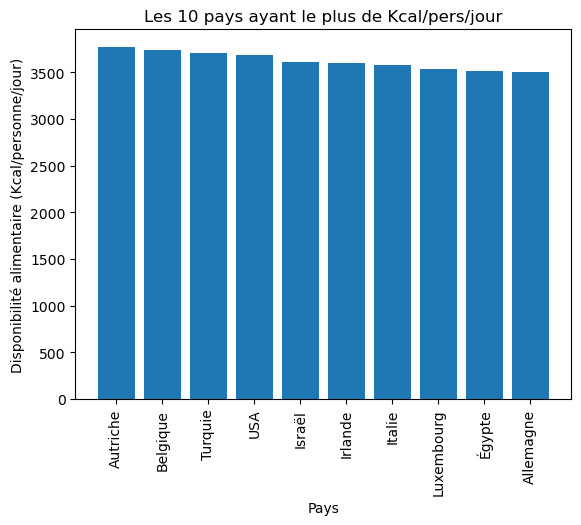

In [65]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
dispo_alimentaire_2017['Zone'] = dispo_alimentaire_2017['Zone'].replace(["États-Unis d'Amérique"],['USA'])

top10_kcal = dispo_alimentaire_2017.sort_values('Disponibilité alimentaire (Kcal/personne/jour)', ascending = False).head(10)
plt.xticks(rotation = 'vertical')
plt.title("Les 10 pays ayant le plus de Kcal/pers/jour")
plt.xlabel('Pays')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.bar(top10_kcal['Zone'],
        top10_kcal['Disponibilité alimentaire (Kcal/personne/jour)'])

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [66]:
#création d'un dataframe avec uniquement la Thaïlande 
dispo_manioc = dispo_alimentaire.loc[(dispo_alimentaire["Zone"] == "Thaïlande") & (dispo_alimentaire["Produit"] == "Manioc")]
dispo_manioc

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800000.0,2081000.0,40.0,13.0,0.05,0.14,6264000.0,25214000.0,1250000.0,871000.0,1511000.0,30228000.0,0.0,0.0,0.0


In [67]:
#Calcul de la sous nutrition en Thaïlande
pop_thailande = population_2017.loc[population_2017['Zone'] == "Thaïlande"]
pop_thailande
sous_nutri_thailande = pop_sous_nutri_2017.loc[pop_sous_nutri_2017['Zone'] == "Thaïlande"]
pop_thailande
sous_nutri_thailande

,Zone,sous_nutrition,Année_y,Population,Proportion sous nutri
185,Thaïlande,6200000.0,2017,69209810.0,8.96


In [68]:
# On calcule la proportion exportée en fonction de la proportion
exportation_manioc = round((dispo_manioc['Exportations - Quantité'] / dispo_manioc['Production']) * 100, 1 )
print(f'La Thaïalnde exporte 83,4% de son manioc')

La Thaïalnde exporte 83,4% de son manioc


In [69]:
nourriture_manioc = round((dispo_manioc['Nourriture'] / dispo_manioc['Production']) * 100, 1 )
print(nourriture_manioc)
print("Seulement 2.9% de la production est destinée à nourrir la population")

13809    2.9
dtype: float64
Seulement 2.9% de la production est destinée à nourrir la population


In [70]:
# Calories par kg de manioc
kcal_manioc = 1570

# Conversion de la part annuelle de manioc exportée en KG
manioc_kilo = 25214 * 1000000

# Calcul de la disponibilité calorique de la quantité de manioc exportée chaque année
apport_kcal_manioc = kcal_manioc * manioc_kilo

# Calcul du nombre de personne qui pourrait être nourrie chaque année si la quantité de manioc dédiée à l'exportation était utilisée pour nourrir la population
nbr_pers_nourrie_manioc = round((apport_kcal_manioc / 2200) / 365,0)


# Calcul du % de la population de Thaïlande que cela représente
proportion_population = round((nbr_pers_nourrie_manioc/pop_thailande['Population']) * 100,1)
print("Chaque année, la Thaïlande exporte", manioc_kilo,"KG de manioc. Si cette part était utilisée pour nourrir sa population, la Thaïlande pourrait subvenir aux besoins en alimentation de", nbr_pers_nourrie_manioc, "individus, cela représente",proportion_population,"% de sa population." )

Chaque année, la Thaïlande exporte 25214000000 KG de manioc. Si cette part était utilisée pour nourrir sa population, la Thaïlande pourrait subvenir aux besoins en alimentation de 49297609.0 individus, cela représente 1312    71.2
Name: Population, dtype: float64 % de sa population.


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [71]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
#le plus en difficulté au niveau alimentaire"